# KAGGLE: CARD FRAUD
### Óscar Sánchez Lima
### 1527377

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler # para escalar nuestro database

from sklearn.model_selection import train_test_split # separar dataset en train o test

#confusion matrix
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

#Roc curve
from sklearn.metrics import plot_roc_curve

#Clasificadores 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

# INTRODUCCION

La base de datos que con la que trabajaremos en este archivo se basa en una lista de transacciones clasificandolas en si son un fraude o no.  


La base de datos contiene los sigueinte atributos: 

- **V1 - V28**: funciones numéricas que son el resultado de la transformación PCA.

- **Tiempo**: Segundos transcurridos entre cada transacción y la primera transacción.

- **Importe**: Importe de la transacción.

- **Clase**: Transaccion Fraude o Transaccion Normal(1 o 0)

## ANALISIS BASE DE DATOS

In [17]:
# visualizamos la base de datos
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# TAMAÑO DE LA BASE DE DATOS (row, column)
df.shape

(284807, 31)

In [19]:
# VISUALIZAR COLUMNAS
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

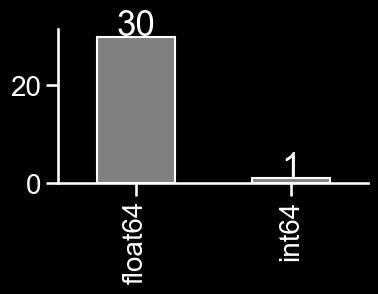

In [20]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.figure(figsize = (4,2))
ax = df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.2, height, ha = 'center', size = 25)
sns.despine()

In [21]:
# DETECTAR  CUANTOS VALORES NULOS HAY
df.isnull().sum().max()

0

In [8]:
# SACAMOS DETALLES DE LA BASE DE DATOS COMO LA MEDIA, EL COUNT TOTAL O LOS MINIMOS.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Analisis de fraudes en la Base de Datos

In [9]:
# IDENTIFICAMOS EL NUMERO DE FRAUDES CON LA COLUMNA CLASS --> si 'CLASS' == '0' NO es fraude, si 'CLASS' == 1 si.
vc = df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc


,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


Text(0.5, 1.0, 'Fraud class histogram \n (0: No Fraud || 1: Fraud)')

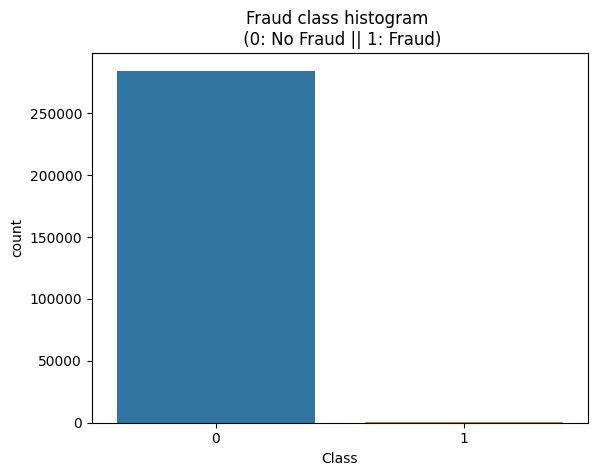

In [10]:
# GRÀFICA
plt.style.use("default")
sns.countplot(x=df["Class"])
plt.title('Fraud class histogram \n (0: No Fraud || 1: Fraud)', fontsize=12)

Como podemos observar en la gráfica vamos a trabajar con una base de datos desequilibrada, ya que la distribución de nuestra variable objetivo es muy desigual. 

## Correlación de atributos

Hay demasiadas características en el conjunto de datos y es difícil entender nada.
Por lo tanto, trazaremos el mapa de correlación solo con la variable objetivo.

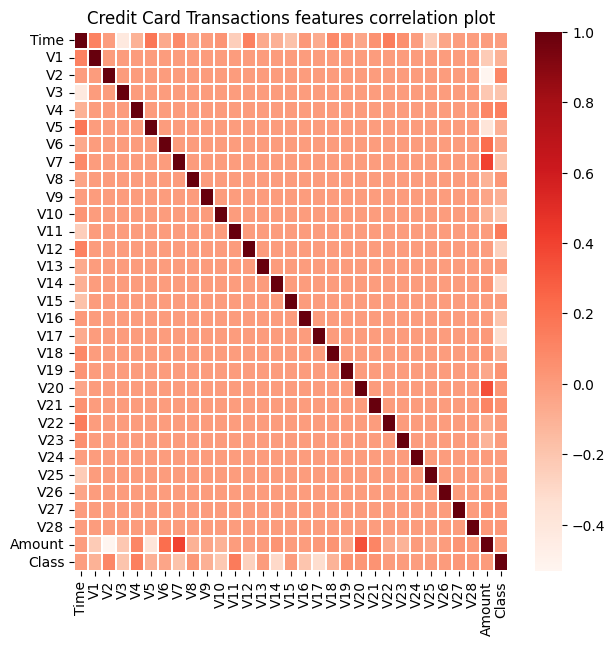

In [11]:
plt.figure(figsize = (7,7))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

### Estandarización de variables.

Como hemos podido analizar todas las características de v1 a v28 estan escaldas, exepto el atributo de 'Amount' y 'Time'.

In [12]:

rob_scale = RobustScaler()

df['scaled_amount']=rob_scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_Time']=rob_scale.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'], axis=1,inplace=True)

# EQUILIBRAR NUESTRO DATASET

Al tener una base de datos desequilibrada utilizare el submuestreo para equilibrarla y asi poder extraer información más precisa.

In [13]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(492)
new_df = pd.concat([fraud,non_fraud],axis = 0)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_Time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413,-0.990214
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469,-0.989438
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204,-0.942563
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013,-0.912910
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440,-0.906648


In [14]:
vc = new_df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(new_df), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Target,Count,percent
0,1,492,50.0
1,0,492,50.0


Text(0.5, 1.0, 'Fraud class histogram \n (0: No Fraud || 1: Fraud)')

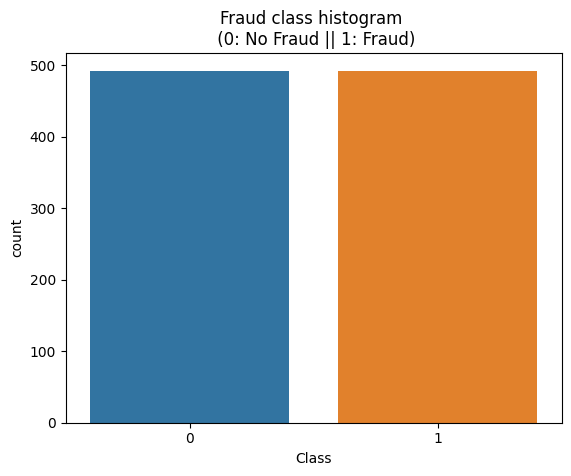

In [15]:
sns.countplot(x=new_df["Class"])
plt.title('Fraud class histogram \n (0: No Fraud || 1: Fraud)', fontsize=12)

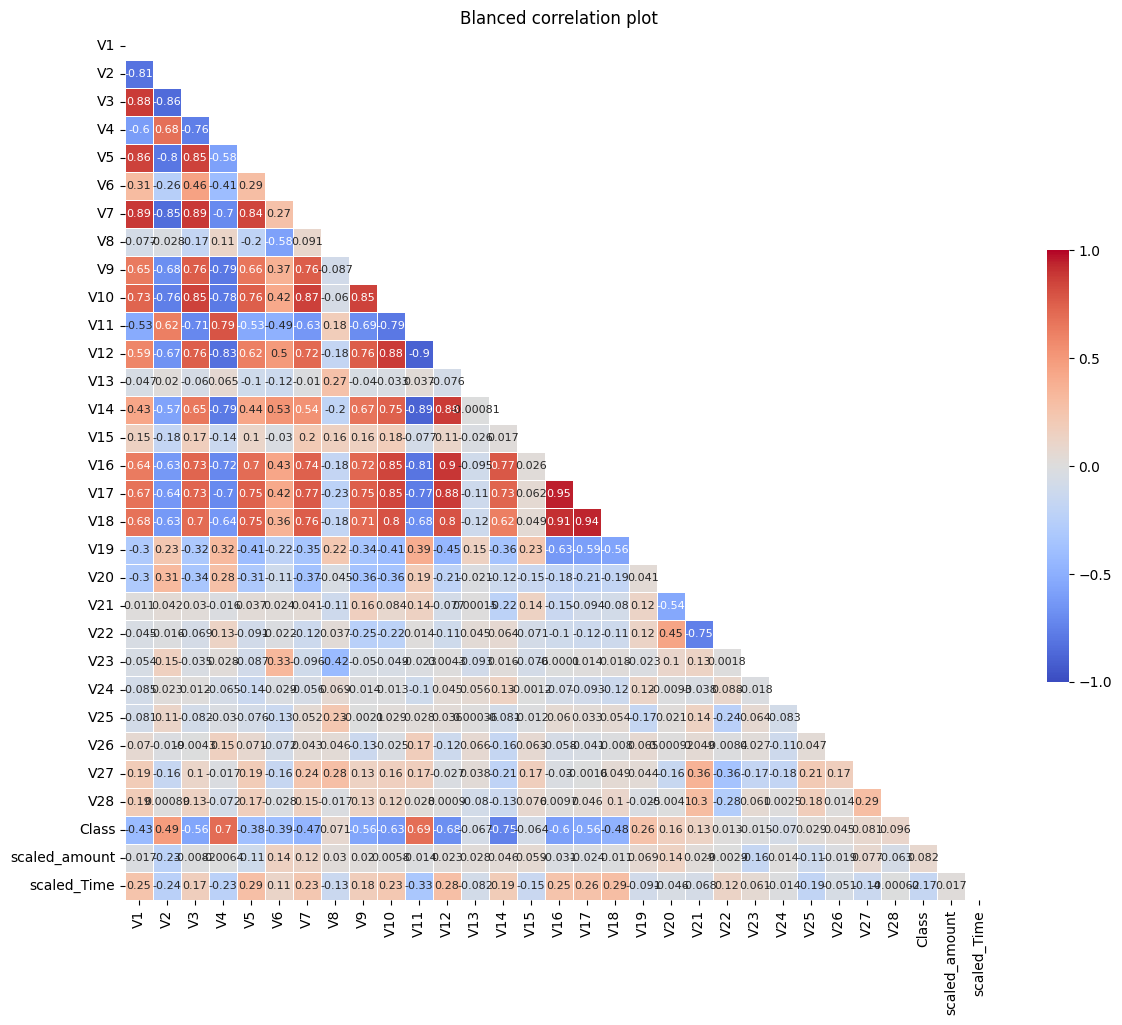

In [28]:
mask = np.zeros_like(new_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize = (14,14))
plt.title('Blanced correlation plot')
corr = new_df.corr()
heatmap = sns.heatmap(corr,
            mask = mask,
            square = True,
            linewidths = .5,
            cmap = 'coolwarm',
            cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
            vmin = -1,
            vmax = 1,
            annot = True,
            annot_kws = {"size": 8},
            )
plt.show()

Si observamos la tabla de correlaciones podemos extraer la siguiente información.
- **Positivos** = V2,V4,V11,V19 --> Contra más altos son estos valores más probable que sea una transaccion fraudulenta.
- **Negativos** = V10,V12,V14,V17 --> Contra más bajos son estos valores más probable que sea una transaccion fraudulenta.

# SEPARAR BASE DE DATOS EN TRAIN Y TEST

Ahora que ya tenemos un dataset balanceado, empezaremos a trabajar con él. Entrenaremos los datos con diferentes modelos.

In [53]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state = 42)

In [54]:
print("Tamaño del Train: " , X_train.shape)
print("Tamaño del Test: " , X_test.shape)

Tamaño del Train:  (787, 30)
Tamaño del Test:  (197, 30)


# CLASIFICADORES PARA ENTRENAR NUESTRO MODELO

En esta sección entrenaremos cuatro tipos de clasificadores y decidiremos qué clasificador será más efectivo para detectar transacciones fraudulentas.

### LogisiticRegression

---------------------------------------
The model used is LogisiticRegression
The accuracy is 0.96
The precision is 0.99
The recall is 0.93
The F1-Score is 0.96
---------------------------------------


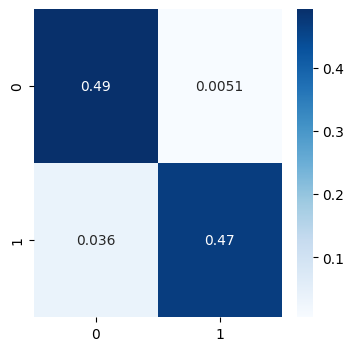

In [118]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
yPred = model.predict(X_test)

print('---------------------------------------')
print("The model used is LogisiticRegression") 

acc = round(accuracy_score(y_test, yPred),2)
print("The accuracy is {}".format(acc)) 

prec = round(precision_score(y_test, yPred),2)
print("The precision is {}".format(prec)) 

rec = round(recall_score(y_test, yPred) ,2)
print("The recall is {}".format(rec)) 

f1 = round(f1_score(y_test, yPred),2)
print("The F1-Score is {}".format(f1)) 
print('---------------------------------------')

#confusion matrix
plt.figure(figsize = (4,4))
cm1 = confusion_matrix(y_test,yPred)
sns.heatmap(cm1/np.sum(cm1), annot = True,cmap ='Blues')
plt.show()

### KNearest

---------------------------------------
The model used is KNearest
The accuracy is 0.95
The precision is 0.98
The recall is 0.93
The F1-Score is 0.95
---------------------------------------


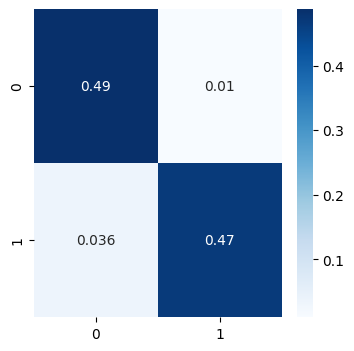

In [120]:
model = KNeighborsClassifier() 
model.fit(X_train,y_train)
yPred = model.predict(X_test)

print('---------------------------------------')
print("The model used is KNearest") 

acc = round(accuracy_score(y_test, yPred),2)
print("The accuracy is {}".format(acc)) 

prec = round(precision_score(y_test, yPred),2)
print("The precision is {}".format(prec)) 

rec = round(recall_score(y_test, yPred) ,2)
print("The recall is {}".format(rec)) 

f1 = round(f1_score(y_test, yPred),2)
print("The F1-Score is {}".format(f1)) 
print('---------------------------------------')

#confusion matrix
plt.figure(figsize = (4,4))
cm1 = confusion_matrix(y_test,yPred)
sns.heatmap(cm1/np.sum(cm1), annot = True,cmap ='Blues')
plt.show()

### Support Vector Classifier

---------------------------------------
The model used is Support Vector Classifier
The accuracy is 0.94
The precision is 1.0
The recall is 0.88
The F1-Score is 0.94
---------------------------------------


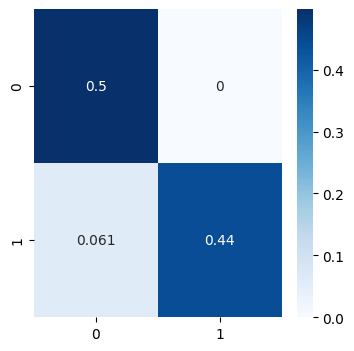

In [122]:
model = SVC()
model.fit(X_train,y_train)
yPred = model.predict(X_test)

print('---------------------------------------')
print("The model used is Support Vector Classifier") 

acc = round(accuracy_score(y_test, yPred),2)
print("The accuracy is {}".format(acc)) 

prec = round(precision_score(y_test, yPred),2)
print("The precision is {}".format(prec)) 

rec = round(recall_score(y_test, yPred) ,2)
print("The recall is {}".format(rec)) 

f1 = round(f1_score(y_test, yPred),2)
print("The F1-Score is {}".format(f1)) 
print('---------------------------------------')

#confusion matrix
plt.figure(figsize = (4,4))
cm1 = confusion_matrix(y_test,yPred)
sns.heatmap(cm1/np.sum(cm1), annot = True,cmap ='Blues')
plt.show()

### DecisionTreeClassifier

---------------------------------------
The model used is DecisionTreeClassifier
The accuracy is 0.89
The precision is 0.86
The recall is 0.93
The F1-Score is 0.89
---------------------------------------


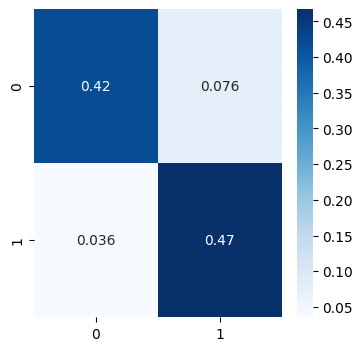

In [130]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
yPred = model.predict(X_test)

print('---------------------------------------')
print("The model used is DecisionTreeClassifier") 

acc = round(accuracy_score(y_test, yPred),2)
print("The accuracy is {}".format(acc)) 

prec = round(precision_score(y_test, yPred),2)
print("The precision is {}".format(prec)) 

rec = round(recall_score(y_test, yPred) ,2)
print("The recall is {}".format(rec)) 

f1 = round(f1_score(y_test, yPred),2)
print("The F1-Score is {}".format(f1)) 
print('---------------------------------------')

#confusion matrix
plt.figure(figsize = (4,4))
cm1 = confusion_matrix(y_test,yPred)
sns.heatmap(cm1/np.sum(cm1), annot = True,cmap ='Blues')
plt.show()

Como podemos ver en los resultados anteriores el modelo que mejor accuracy da es el LogisticRegression, con un 96% de accuracy. 

## ROC CURVE

Text(0.5, 1.0, 'DecisionTreeClassifier')

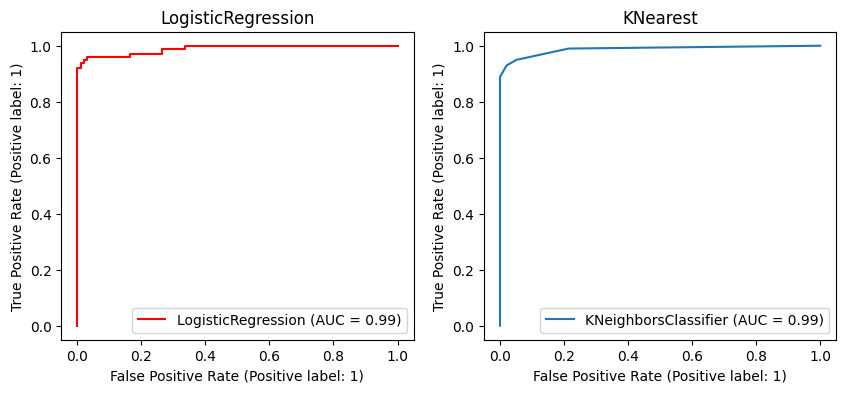

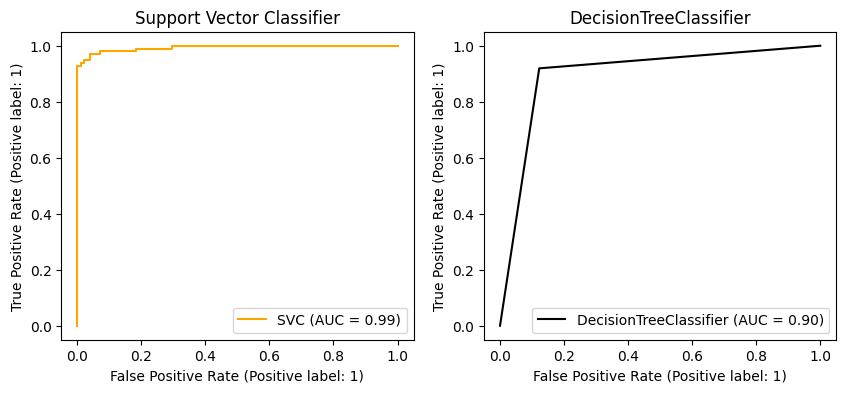

In [162]:
fig,ax = plt.subplots(ncols = 2,figsize = (10,4))
plot_roc_curve(LogisticRegression(solver='liblinear').fit(X_train,y_train) ,X_test,y_test,ax = ax[0], color = "red")
ax[0].set_title("LogisticRegression")

plot_roc_curve(KNeighborsClassifier().fit(X_train,y_train) ,X_test,y_test,ax = ax[1])
ax[1].set_title("KNearest")

fig,ax = plt.subplots(ncols = 2,figsize = (10,4))
plot_roc_curve(SVC().fit(X_train,y_train),X_test,y_test,ax = ax[0], color = "orange")
ax[0].set_title("Support Vector Classifier")

plot_roc_curve(DecisionTreeClassifier().fit(X_train,y_train),X_test,y_test,ax = ax[1], color="black")
ax[1].set_title("DecisionTreeClassifier")